In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#fixing the size of graph size 
plt.rcParams['figure.figsize'] = (10.0 , 8.0)
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend:
%matplotlib inline


from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

sys.path.append("C:\\personal\\final\MACHINE_LEARNING_GITHUB\\MACHINE_LEARNING\\Housing_price_data\\seaborn-master\\seaborn-master\\")
import seaborn as sns
#from keras.wrappers.scikit_learn import KerasRegressor
#from keras.models import Sequential
#from keras.layers import Dense
#import xgboost as xgb
"""
seaborn: statistical data visualization.
Seaborn is a Python visualization library based on matplotlib.
It provides a high-level interface
for drawing attractive statistical graphics.

"""

'\nseaborn: statistical data visualization.\nSeaborn is a Python visualization library based on matplotlib.\nIt provides a high-level interface\nfor drawing attractive statistical graphics.\n\n'

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [52]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 1460 rows and 81 columns
----------------------------
The test data has 1459 rows and 80 columns


In [54]:
#train.info()

# let check missing data

In [55]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

# let check percentage of missing value

In [57]:
"""

#missing value counts in each of these columns
miss_sum = train.isnull().sum()
miss_percen = miss_sum / len(train)
#print(miss_percen)
miss_list = miss_percen[ miss_percen > 0] #pushing in list when percentage is greate than 0
#print(miss)
miss_list.sort_values( inplace = True )
print(miss_list)


"""

#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)  
print(type(miss))
miss





<class 'pandas.core.series.Series'>


Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

# Let's look at a pretty picture explaining these missing values using a bar plot.

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Index(['count'], dtype='object')
['Name']


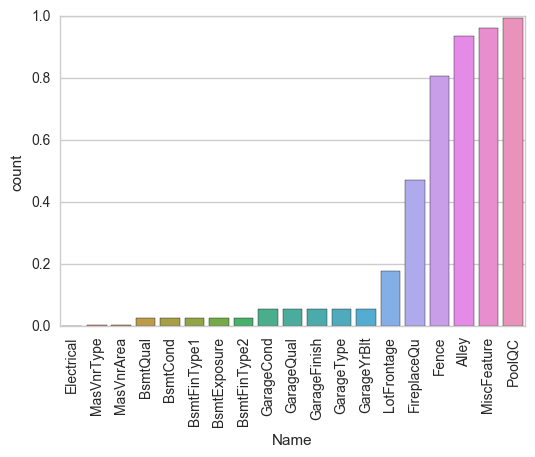

In [66]:
#visualising missing value
print(type(miss))
#miss = pd.to_frame(miss   #generally used for changing series to dataframe
miss1 = pd.DataFrame(miss)
print(type(miss1))

#very interesting to see miss value after execution and without execution

miss1.columns = ['count']
print(miss1.columns)
miss1.index.names = ['Name']
print(miss1.index.names)
miss1['Name'] = miss1.index



#plot the missing value count
sns.set(style="whitegrid" , color_codes = True)
plt.xticks(rotation=90)
sns.barplot( x = "Name", y = 'count' ,data = miss1)

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


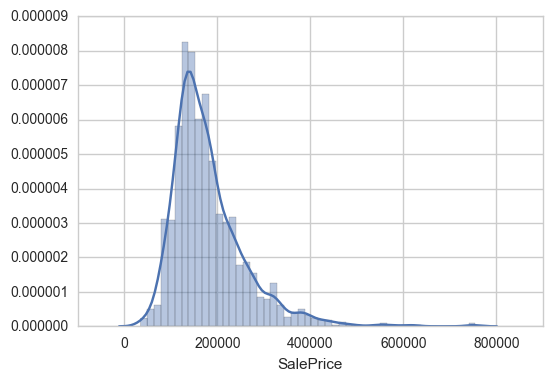

In [68]:
#SalePrice
sns.distplot(train['SalePrice'])

# Fixing the right skewness

In [70]:
#print current graph skewness
print("The Skewness of SalePrice is {}".format(train['SalePrice'].skew()))

The Skewness of SalePrice is 1.8828757597682129


The skewness of Saleprice now is 0.12133506220520406


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


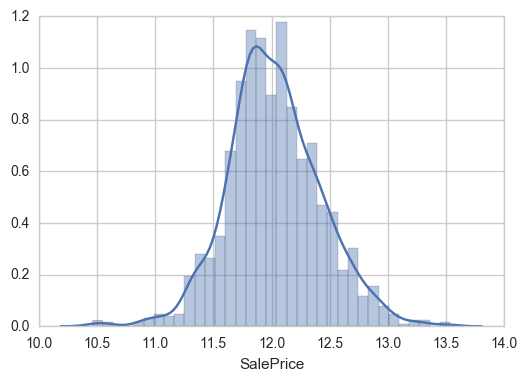

In [76]:
#now transforming the target variable
target = np.log(train['SalePrice'])
print("The skewness of Saleprice now is {}".format(target.skew()))
sns.distplot(target)


# #separate variables into new data frames in numerical and categorical data

In [95]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print("There are {} numeric and {} categorical columns in train in train".format(numeric_data.shape[0],cat_data.shape[0]))
print("There are {} numeric and {} categorical columns in train in train".format(numeric_data.shape[1],cat_data.shape[1]))

There are 1460 numeric and 1460 categorical columns in train in train
There are 38 numeric and 43 categorical columns in train in train


# Removing the id from the Datafrome

In [96]:
del numeric_data['Id']

# Correlation plot
 #we can later remove these correlated variables as they won't provide any useful information to the model.

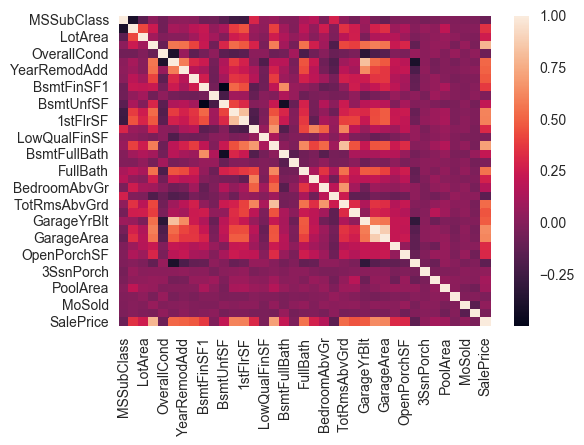

In [94]:
corr = numeric_data.corr()
sns.heatmap(corr)

#We can see the correlation of all variables against SalePrice.
#some variables seem to be strongly correlated with the target variable.
#A numeric correlation score will help us understand the graph better.

In [104]:
#print(corr['SalePrice'].sort_values(ascending = False)[:],'\n')
print(corr['SalePrice'].sort_values(ascending = False)[:15],'\n')  # first top 15 values

print( corr['SalePrice'].sort_values(ascending= True )[:5],'\n')



SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64 



#we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area

# Let's check the OverallQual variable in detail.


In [109]:
train['OverallQual'].unique()



array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

#we can fairly treat it as an ordinal variable. An ordinal variable has an inherent order
#Let's check the median sale price of houses with respect to OverallQual.

#You might be wondering, “Why median ?” We are using median because the target variable is skewed. A skewed variable has outliers and median is robust to outliers.

In [126]:
#let's check the mean price per quality and plot it.
print(type(train))
#pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
#above line does not work 

pivot = pd.pivot_table(train,index="OverallQual",values = "SalePrice",aggfunc=np.median)
pivot.sort

<class 'pandas.core.frame.DataFrame'>


<bound method Series.sort of OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64>

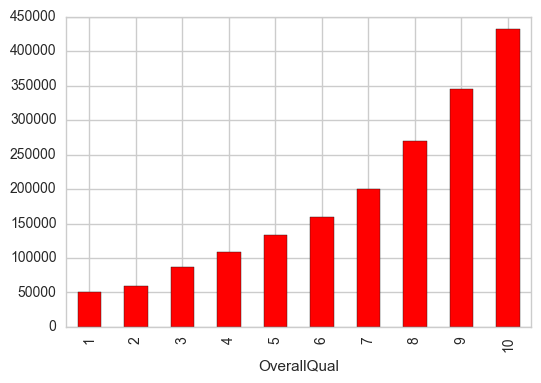

In [127]:
pivot.plot(kind='bar',color='red')

As the overall quality of a house increases, its sale price also increases.

# Let's visualize the next correlated variable GrLivArea and understand their behavior.

# learn this jointplot()

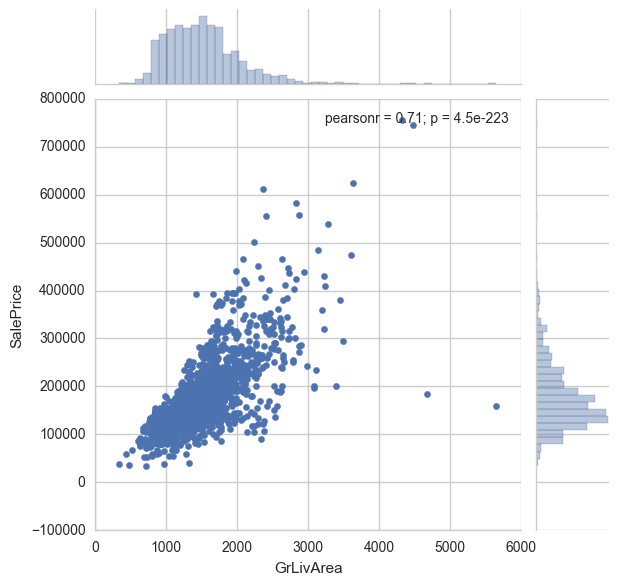

In [130]:

sns.jointplot(x=train['GrLivArea'] , y = train['SalePrice'])

 As seen above, here also we see a direct correlation of living area with sale price. 
 
 
However, we can spot an outlier value GrLivArea > 5000. I've seen outliers play a significant role in spoiling a model's performance.Hence, we'll get rid of it.

If you are enjoying this activity, you can visualize other correlated variables as well.






# Now, we'll move forward and explore categorical features. The simplest way to understand categorical variables is using .describe() command.

In [131]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [ ]:
Why do we use inplace=True in sort_value